In [1]:
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt
import scipy                  # http://scipy.org/
from scipy import signal

import matplotlib.pyplot as plt
import numpy as np


from IPython.display import Image  
%matplotlib inline
params = {'legend.fontsize': 16,
          'figure.figsize': (10, 8),
         'axes.labelsize': 16,
         'axes.titlesize': 16,
         'xtick.labelsize':16,
         'ytick.labelsize':16}
plt.rcParams.update(params) 

from scipy.fftpack import fft, fftfreq
from time import time

# Tereorema de muestreo

El teorema de muestreo permite demostrar que la reconstrucción de una señal periodica continua en banda base a partir de sus muestras, es matemáticamente posible si la señal está limitada en banda y la tasa de muestreo es superior al doble de su ancho de banda (no igual).

Dicho de otro modo, la información completa de la señal analógica original que cumple el criterio anterior está descrita por la serie total de muestras que resultaron del proceso de muestreo. 
No hay nada, por tanto, de la evolución de la señal entre muestras que no esté perfectamente definido por la serie total de muestras.

Si la frecuencia más alta contenida en una señal analógica $x_a(t)$ es $F_{max}=B$ y la señal se muestrea a una tasa $F_s>2F_{max} \equiv 2B$, entonces $x_a(t)$ se puede recuperar totalmente a partir de sus muestras mediante la siguiente función de interpolación:

$$g(t) = \frac{\sin 2 \pi B t}{2 \pi B t}$$

Así, $x_a(t)$ se puede expresar como:

$$x_a(t) = \sum_{n=-\infty}^{\infty} x_a \left(\frac{n}{F_s}\right) g \left(t-\frac{n}{F_s}\right)$$

donde $x_a \left(\frac{n}{F_s}\right)= x_a \left(nT\right) \equiv x \left(n\right)$ son las muestras de $x_a \left(t\right)$.

Hay que notar que el concepto de ancho de banda no necesariamente es sinónimo del valor de la frecuencia más alta en la señal de interés. 
A las señales para las cuales esto sí es cierto se les llama señales de banda base, y no todas las señales comparten tal característica (por ejemplo, las ondas de radio frecuencia en frecuencia modulada).

Si el criterio no es satisfecho, existirán frecuencias cuyo muestreo coincide con otras (el llamado aliasing).




f_s=100.00


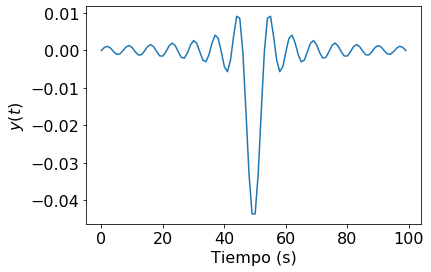

/home/aalmela/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


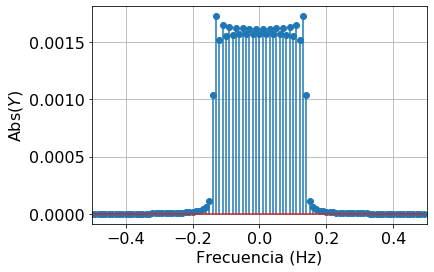

In [2]:
Nt = 100         # Número de bines
f  = 1     # Hz
fs = f*Nt     # muestreo
dt = 100 / (fs)  # Espaciado (puntos por período)

print("f_s={:1.2f}".format(fs))

# np.linspace( inicio, fin, paso)
t  = np.linspace(0, (Nt - 1) * dt, Nt)  # Intervalo de tiempo en segundos 

y  = np.sinc(2 * pi * f * t -pi*max(t)*f)   # Señal

plt.plot(t, y)
#plt.plot(t, y, 'ko')
plt.xlabel('Tiempo (s)')
plt.ylabel('$y(t)$')
plt.show()

#start_time = time()
Y = fft(y) / Nt  # Normalizada

#elapsed_time = time() - start_time
#print("Elapsed time: %.10f seconds." % elapsed_time)

frq  = fftfreq(Nt, dt)  # Recuperamos las frecuencias

plt.stem(frq, np.abs(Y) )  # Representamos la parte imaginaria
plt.xlim(-0.5, 0.5)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Abs($Y$)')
plt.grid()
plt.show()

# MUESTRO DE SEÑALES Y SEUDOCOMPONENTES


Una señal de tiempo continuo $x(t)$ puede representarse completamente por medio de una serie de secuencia de valores de muestras $x[n]$, tomadas a intervalos regulares, $T$, a lo largo del eje del tiempo.

En la práctica, la forma de onda y el espectro de una señal que porta información, por ejemplo un canal de sonido, puede se en extremo compleja. 
Si embargo, la transferencia de la señal de información del dominio de tiempo continuo a un conjunto de muestras puede realizarse con relativa facilidad debido a que un muestreo efectivo no depende del conocimiento previo detallado de una señal.

Basta con saber que la señal contiene componentes de frecuencia hasta de cierta frecuencia máxima de ancho de banda, $f_B$. 
Si la frecuencia de muestreo $f_S$ se selecciona de manera que $f_S >2 f_B$, de acuerdo con el Teorema del Muestreo, la forma de onda de la señal original puede recuperarse sin distorsión interpolando los valores de sus muestras $x[n]$.

La consecuencia inmediata de todo esto es que se pueden almacenar muestras de datos digitales. 
Todas las operaciones de procesamiento de la información pueden programarse en un sistema digital.

Inicialmente se podría pensar en términos de operaciones de filtrado en el dominio del tiempo, pero, como se verá, el mismo sistema digital también puede emplearse para calcular transformadas directas e inversas, haciendo posible observar todas las operaciones que se realizan en una señal tanto en el dominio del tiempo como de la frecuencia.

Puesto que el principal objetivo aquí son los modelos en el dominio de la frecuencia, se considerará en primer lugar la relación existente entre el espectro de una señal continua $x(t)$:


$$X(j\omega)= \int_{-\infty}^{\infty} x(t) e^{ -j \omega t}dt$$

y el espectro de su secuencia muestreada $x[n]$

$$X(e^{ -j \omega t}) =  \sum_{n=-\infty}^{-\infty} n[n]\cdot e^{j n \omega T}$$

donde tanto $x(t)$ como $x[n]$ son señales de energía finita.



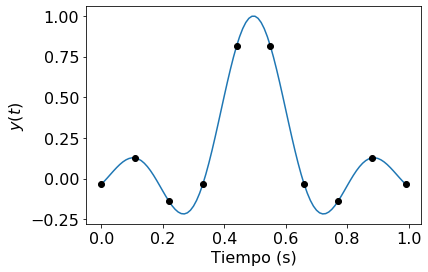

/home/aalmela/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


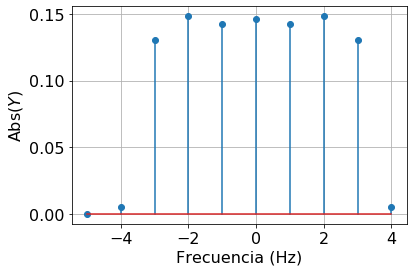

/home/aalmela/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


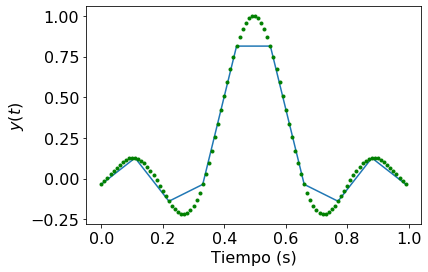

In [14]:
Dn = 10
fm = fs/Dn
dm = 1/fm
# np.linspace( inicio, fin, paso)
tm  = np.linspace(0, (Nt - 1) * dt, Nt/Dn)  # Intervalo de tiempo en segundos 

ym  = np.sinc(2 * pi * f * tm -pi*max(tm)*f)   # Señal

plt.plot(t, y)

plt.plot(tm, ym, 'ko')
plt.xlabel('Tiempo (s)')
plt.ylabel('$y(t)$')
plt.show()

#start_time = time()
Ym = fft(ym) / Nt*Dn  # Normalizada

#elapsed_time = time() - start_time
#print("Elapsed time: %.10f seconds." % elapsed_time)

frqm  = fftfreq(int(Nt/Dn), dm)  # Recuperamos las frecuencias

plt.stem(frqm, np.abs(Ym) )  # Representamos la parte imaginaria
#plt.ylim(-0.1, 1.4)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Abs($Y$)')
plt.grid()
plt.show()

# Do an inverse Fourier transform on the signal
yt = np.fft.ifft(Ym)*Nt/Dn
 

# Plot the original sine wave using inverse Fourier transform
plt.plot(tm, yt)
plt.plot(t, y, 'g.')
plt.xlabel('Tiempo (s)')
plt.ylabel('$y(t)$')
plt.show()

## Spectral leakage

Cuando se calcula la transformada discreta de Fourier (DFT) de una señal (por ejemplo, para obtener la densidad espectral de potencia), el manchado espectral o leakage ocurrirá si alguna de las componentes frecuenciales cae entre frecuencias de referencia.

El leakage también tiene lugar cuando se calcula la DFT de una señal que contiene el resto de un ciclo. Por ejemplo, si una onda senoidal de 3 Hz se muestrea durante 0.9 segundos, se produce una discontinuidad, la cual causa un manchado espectral. 


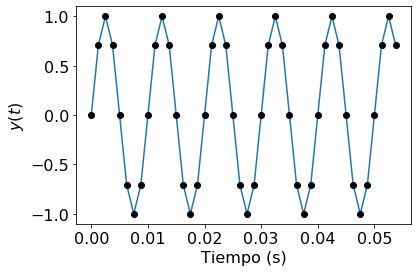

Elapsed time: 0.0003614426 seconds.


/home/aalmela/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


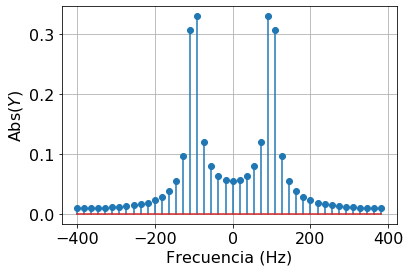

In [26]:
Nt = 44        # Número de bines
f  = 100.0     # Hz
fs = f * 8     # muestreo
dt = 1 / (fs)  # Espaciado (puntos por período)


t  = np.linspace(0, (Nt - 1) * dt, Nt)  # Intervalo de tiempo en segundos 

y  = np.sin(2 * pi * f * t)   # Señal

plt.plot(t, y)
plt.plot(t, y, 'ko')
plt.xlabel('Tiempo (s)')
plt.ylabel('$y(t)$')
plt.show()

start_time = time()
Y = fft(y) / Nt  # Normalizada

elapsed_time = time() - start_time
print("Elapsed time: %.10f seconds." % elapsed_time)

frq  = fftfreq(Nt, dt)  # Recuperamos las frecuencias

plt.stem(frq, np.abs(Y) )  # Representamos la parte imaginaria
#plt.ylim(-0.1, 1.4)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Abs($Y$)')
plt.grid()
plt.show()

## Zero Padding


Zero padding es una tecnica empleada con el objetivo de tener ventanas con numeros de bines multiplos de 2. Para ello se agregan ceros al final de la muestra.

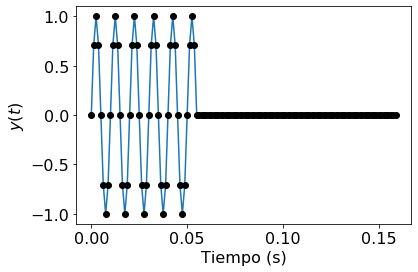

Elapsed time: 0.0001928806 seconds.


/home/aalmela/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


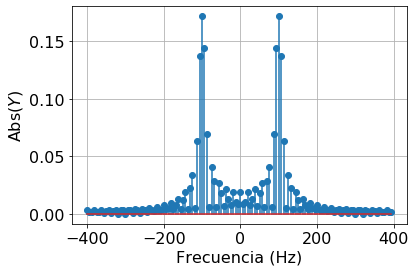

In [27]:
Nt = 128        # Número de bines
Ns = 44
f  = 100.0     # Hz
fs = f * 8     # muestreo
dt = 1 / (fs)  # Espaciado (puntos por período)

# np.linspace( inicio, fin, paso)
t  = np.linspace(0, (Nt - 1) * dt, Nt)  # Intervalo de tiempo en segundos 


y  = np.sin(2 * pi * f * t[:Ns])   # Señal
y  = np.append(y, np.zeros(Nt-Ns) )

plt.plot(t, y)
plt.plot(t, y, 'ko')
plt.xlabel('Tiempo (s)')
plt.ylabel('$y(t)$')
plt.show()

start_time = time()
Y = fft(y) / Nt  # Normalizada

elapsed_time = time() - start_time
print("Elapsed time: %.10f seconds." % elapsed_time)

frq  = fftfreq(Nt, dt)  # Recuperamos las frecuencias

plt.stem(frq, np.abs(Y) )  # Representamos la parte imaginaria
#plt.ylim(-0.1, 1.4)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Abs($Y$)')
plt.grid()
plt.show()

## Ventanas 


Cuando usamos una FFT para medir los componentes de frecuencia de nuestra señal, la FFT asume que se le está dando una parte de una señal periódica. 
Se comporta como si la parte de la señal que proporcionamos continuara repitiéndose indefinidamente. Es como si la última muestra de la rebanada se conectara de nuevo a la primera muestra. Proviene de la teoría detrás de la Transformada de Fourier. Significa que queremos evitar transiciones repentinas entre la primera y la última muestra porque las transiciones repentinas en el dominio del tiempo parecen muchas frecuencias y, en realidad, nuestra última muestra no se conecta con nuestra primera muestra. En pocas palabras: si estamos haciendo una FFT de 100 muestras, np.fft.fft(x)queremos que x[0]y x[99]sea igual o cercano en valor.

La forma en que compensamos esta propiedad cíclica es mediante "ventanas". Justo antes de la FFT, multiplicamos el segmento de señal por una función de ventana, que es cualquier función que se reduce a cero en ambos extremos. Eso asegura que la porción de señal comenzará y terminará en cero y se conectará. Las funciones de ventana comunes incluyen Hamming, Hanning, Blackman y Kaiser. Cuando no aplica ninguna ventana, se llama usar una ventana "rectangular" porque es como multiplicar por una matriz de unos. Así es como se ven varias funciones de ventana:

Existe una manera de reducir la fuga y es mediante el uso de funciones ventana. Las funciones ventana no son más que funciones que valen cero fuera de un cierto intervalo, y que en procesamiento de señales digitales se utilizan para «suavizar» o filtrar una determinada señal. NumPy trae unas cuantas funciones ventana por defecto; por ejemplo, la ventana de Blackman tiene este aspecto


Como se puede ver, en los extremos del intervalo es nula. Las funciones ventana reciben un único argumento que es el número de puntos. Si multiplicamos la ventana por la señal, obtenemos una nueva señal que vale cero en los extremos. Comprobemos el resultado, representando ahora el espectro de amplitud y comparando cómo es el resultado si aplicamos o no la ventana de Blackman.

Un enfoque simple para principiantes es simplemente quedarse con una ventana de Hamming, que se puede crear en Python np.hamming(N)donde N es la cantidad de elementos en la matriz, que es su tamaño de FFT. En el ejercicio anterior, aplicaríamos la ventana justo antes de la FFT. Después de la segunda línea de código insertaríamos:

Si tiene miedo de elegir la ventana incorrecta, no lo haga. La diferencia entre Hamming, Hanning, Blackman y Kaiser es mínima en comparación con no usar una ventana en absoluto, ya que todos se reducen a cero en ambos lados y resuelven el problema subyacente.

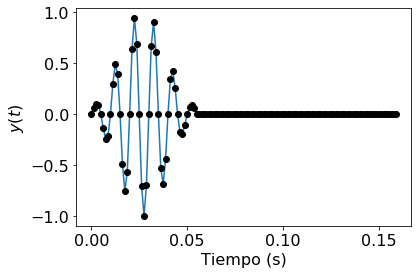

Elapsed time: 0.0001847744 seconds.


/home/aalmela/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


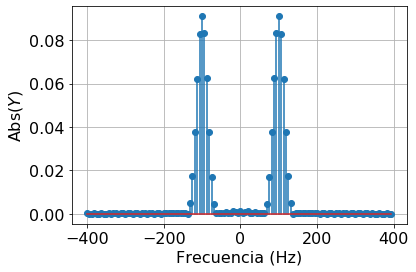

In [18]:
Nt = 128
Ns = 44         # Número de bines

f  = 100.0     # Hz
fs = f * 8     # muestreo
dt = 1 / (fs)  # Espaciado (puntos por período)

# np.linspace( inicio, fin, paso)
t4  = np.linspace(0, (Nt - 1) * dt, Nt)  # Intervalo de tiempo en segundos 

y4 = np.sin(2 * pi * f * t4[:Ns])   # Señal


#y4 = y4 * np.bartlett(Ns)
#y4 = y4 * np.blackman(M) 
y4 = y4 * np.hamming(M) 
#y4 = y4 * np.hanning(M) 
#y4 = y4 * np.kaiser(M, 10) 

y4  = np.append(y4, np.zeros(Nt-Ns) )

plt.plot(t4, y4)
plt.plot(t4, y4, 'ko')
plt.xlabel('Tiempo (s)')
plt.ylabel('$y(t)$')
plt.show()

start_time = time()
Y4 = fft(y4) / Nt  # Normalizada

elapsed_time = time() - start_time
print("Elapsed time: %.10f seconds." % elapsed_time)

frq4 = fftfreq(Nt, dt)  # Recuperamos las frecuencias

plt.stem(frq4, np.abs(Y4) )  # Representamos la parte imaginaria
#plt.ylim(-0.1, .8)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Abs($Y$)')
plt.grid()
plt.show()

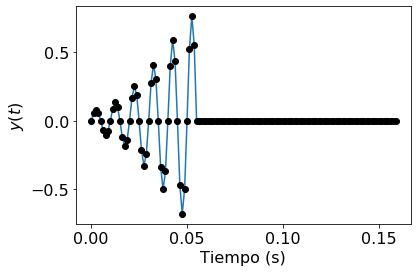

Elapsed time: 0.0076992512 seconds.


/home/aalmela/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


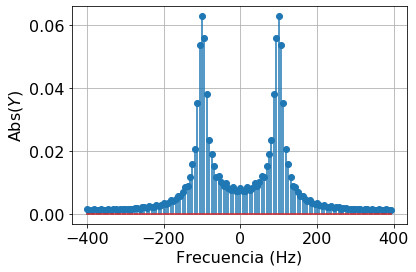

In [19]:
Nt = 128
Ns = 44         # Número de bines

f  = 100.0     # Hz
fs = f * 8     # muestreo
dt = 1 / (fs)  # Espaciado (puntos por período)

# np.linspace( inicio, fin, paso)
t4  = np.linspace(0, (Nt - 1) * dt, Nt)  # Intervalo de tiempo en segundos 

y4 = np.sin(2 * pi * f * t4[:Ns])   # Señal

y4  = np.append(y4, np.zeros(Nt-Ns) )

#y4 = y4 * np.bartlett(Nt)
#y4 = y4 * np.blackman(Nt) 
y4 = y4 * np.hamming(Nt) 
#y4 = y4 * np.hanning(Nt) 
#y4 = y4 * np.kaiser(Nt, 10) 


plt.plot(t4, y4)
plt.plot(t4, y4, 'ko')
plt.xlabel('Tiempo (s)')
plt.ylabel('$y(t)$')
plt.show()

start_time = time()
Y4 = fft(y4) / Nt  # Normalizada

elapsed_time = time() - start_time
print("Elapsed time: %.10f seconds." % elapsed_time)

frq4 = fftfreq(Nt, dt)  # Recuperamos las frecuencias

plt.stem(frq4, np.abs(Y4) )  # Representamos la parte imaginaria
#plt.ylim(-0.1, .8)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Abs($Y$)')
plt.grid()
plt.show()